<a href="https://colab.research.google.com/github/fjoseph631/Machine-Learning/blob/master/Problem_3_HW1_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading in MNIST Data Set

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

##Model Building

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 6
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

##Partiioning And Displaying Results


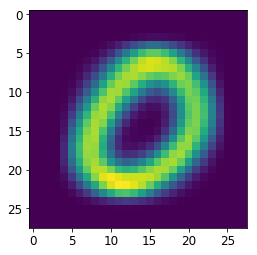

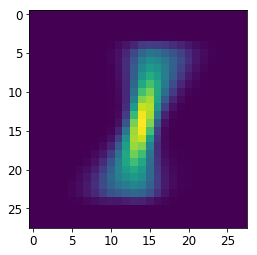

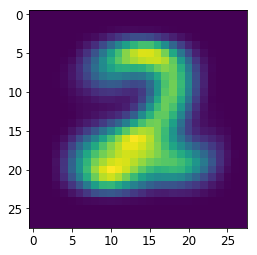

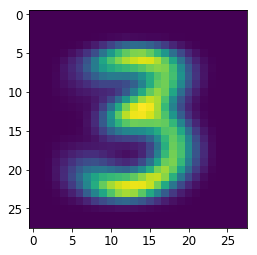

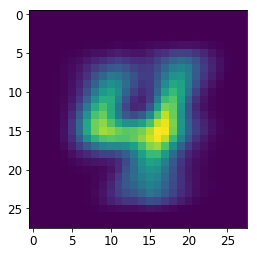

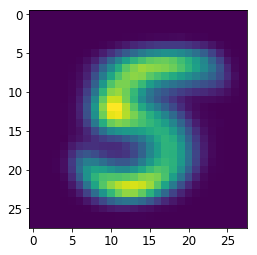

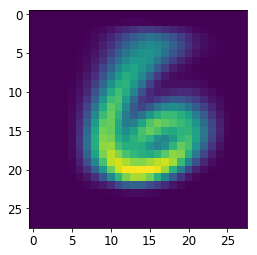

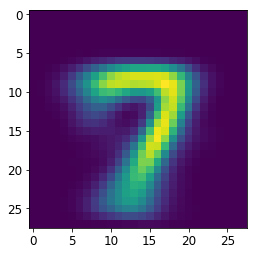

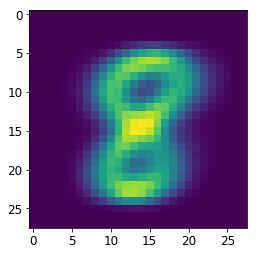

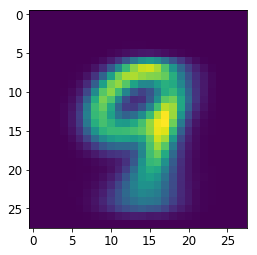

In [0]:


# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# lopp and filter based on labels
sets=[]
images=[]
for i in range (10):
  sets.append([])
  images.append([])


#for i in range (10):
  #print(train_labels[0])
predictions = network.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1) 
predicted_labels = predicted_labels.astype('uint8')

for i in range (10):
  for j in range (len(predicted_labels)):
    if(predicted_labels[j]==i):
      sets[i].append(predicted_labels[j])
      images[i].append(test_images[j])
for i in range (10):
  avgArray=np.zeros((28,28))
  for j in range (0,len(sets[i])):
    arr=(images[i][j])
    arr=np.reshape(arr, (28, 28))
    avgArray+=arr
  plt.figure(figsize=(4,4))
  plt.imshow(avgArray)

wrong_indices = [i for i in range(len(test_images)) if predicted_labels[i] != test_labels_original[i]]
correct_indices =[i for i in range(10000) if predicted_labels[i] == test_labels_original[i]]

